### How this notebook is different

- Previous tutorial: Single linear (logistic regression) model with no hidden layers.  
- This notebook: Uses multiple layers with non-linear activations (feedforward neural network), so it can learn more complex patterns.  
- In short: Logistic regression is a simple linear classifier; this is a deeper non-linear model.


In [1]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [2]:
dataset = MNIST(root='/content/data/', download=True, transform=ToTensor())

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.95MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.15MB/s]


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.utils import make_grid
from torch.utils.data import random_split

In [4]:
len(dataset)

60000

In [5]:
dataset[345]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

to show this we use plt.imshow but this uses h w c but we have cwh using to tensor method so we use permute method to permute the dimensions 

In [6]:
image,label = dataset[0]
image.shape

torch.Size([1, 28, 28])

In [7]:
image.permute(1,2,0).shape

torch.Size([28, 28, 1])

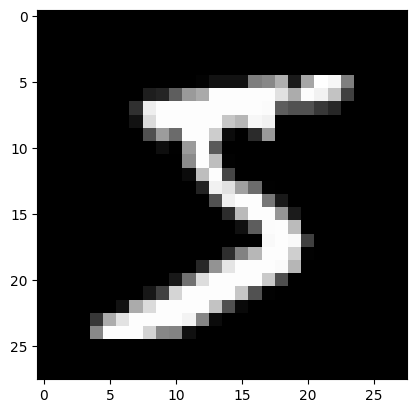

In [8]:
plt.imshow(image.permute(1,2,0),cmap="gray")

next lets use the random_split function to set aside 10k images for out validation set

In [9]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds , val_ds = random_split(dataset , [train_size,val_size])
len(train_ds) , len(val_ds)

(50000, 10000)

In [10]:
batch_size = 128

train_loader = DataLoader(train_ds,batch_size,shuffle = True,num_workers=4,pin_memory=True)
val_loader = DataLoader(val_ds,batch_size*2,num_workers = 4 , pin_memory = True)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


lets visualize a batch of data in a grind using the make_grid function from torchvisoin we will also use the .permute method on the tensor to move the channels to the last dimension as expected by matplotlib

images.shape torch.Size([128, 1, 28, 28])


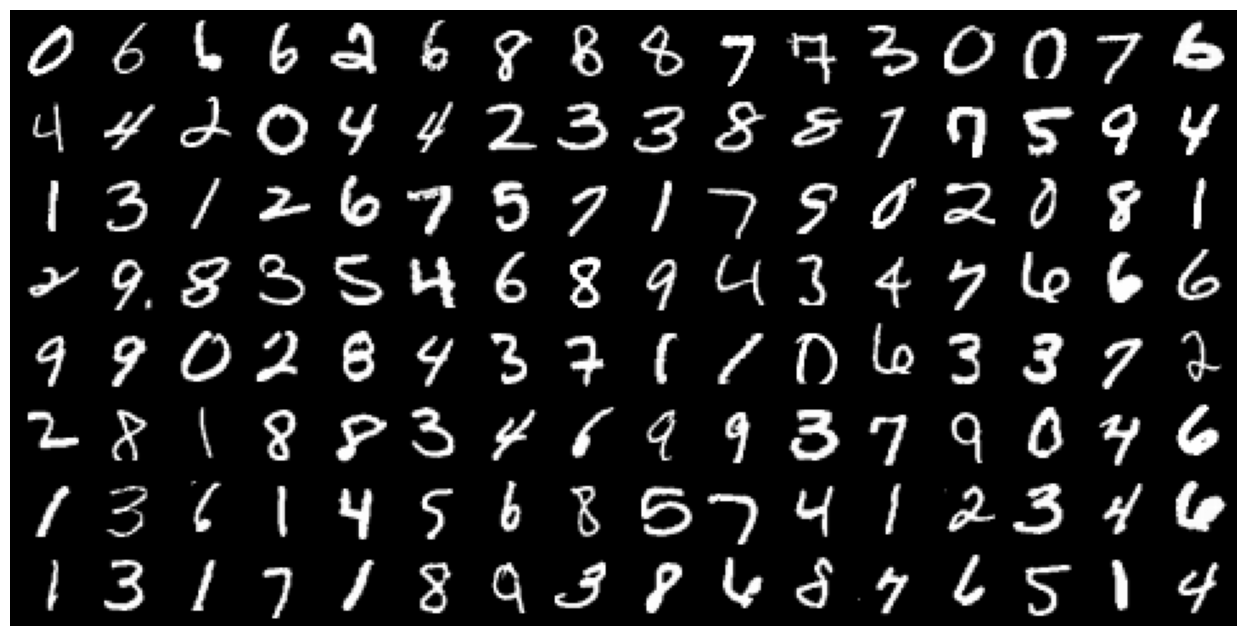

In [11]:
for images , _ in train_loader:
    print('images.shape',images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

this time we will have 2 layers with activation function , first lets create a batch of input tensors we will flateen the 1x28x28 images into vectors of size 784 so they can be passed inot an nn.Linear object

In [12]:
for images , labels in train_loader:
    print('images.shape',images.shape)
    inputs = images.reshape(128,784)
    print('inputs.shape',inputs.shape)
    break

images.shape torch.Size([128, 1, 28, 28])
inputs.shape torch.Size([128, 784])


In [13]:
input_size = inputs.shape[-1]
hidden_size = 32


here we choose the size of hidden layer to be 32

In [14]:
layer1  = nn.Linear(input_size,hidden_size)

In [15]:
layer1_outputs = layer1(inputs)
print("layer1_outputs.shape",layer1_outputs.shape)

layer1_outputs.shape torch.Size([128, 32])


now for non linearisatoin we will use relu 

In [16]:
relu_outputs = F.relu(layer1_outputs)

In [17]:
relu_outputs

tensor([[0.1869, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.4381, 0.1929, 0.0940,  ..., 0.0000, 0.0000, 0.0000],
        [0.0762, 0.0019, 0.0981,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2884, 0.0000, 0.0988,  ..., 0.0000, 0.0000, 0.0000],
        [0.2759, 0.1131, 0.1444,  ..., 0.0000, 0.0000, 0.0000],
        [0.1575, 0.2504, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)

In [18]:
output_size = 10
layer2 = nn.Linear(hidden_size,output_size)

In [19]:
layer2_outputs = layer2(relu_outputs)


In [20]:
layer2_outputs.shape

torch.Size([128, 10])

****MODEL****

Instead of using a single nn.Linear object to transform a batch of inputs (pixel intensities) into outputs(class probabilites) we will use two nn.Linear objects.each of these is called a layer in the network

The first layer(hidden layer) will transform the input matrix of shape batch_size x 784 inot an intermediate output matrix of shape batch_size x hidden_size . The parameter hidden_size can be configured manually 

we will then apply non linear activation function to the intermediate outputs . The activation function transforms individual elements of the matrix

The result of the activation function which is also the size of batch_size x hidden_size is passed into the second layer . The second layer transforms it into a matrix of size batch_size x 10 we can use this output to compute the loss and adjust weights using gradient descent

Defining the model by extending the nn.Module class from pytorch

In [21]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size,hidden_size)
        self.linear2 = nn.Linear(hidden_size,out_size)

    def forward(self,xb):
        xb = xb.view(xb.size(0),-1) #flatten the image tensors
        out = self.linear1(xb)
        #apply activation function 
        out = F.relu(out)
        out = self.linear2(out)
        return out   
    
    def training_step(self,batch):
        #returns the loss gor a batch of training data
        images , labels = batch
        out = self(images) #invokes forward method directly
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return{'val_loss':loss,'val_acc':acc}
    
    
    def validation_epoch_end(self, outputs):
         batch_losses = [x['val_loss'] for x in outputs]
         epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
         batch_accs = [x['val_acc'] for x in outputs]
         epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
      print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    

     


In [22]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim = 1)
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

we will create a model that contains a hidden layer with 32 activatoins

In [23]:
input_size = 784
hidden_size = 32
num_classes = 10

In [24]:
model = MnistModel(input_size,hidden_size,out_size=num_classes)

In [25]:
model.parameters()

<generator object Module.parameters at 0x7d378f421620>

In [26]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


lets try generateing some outputs 

In [27]:
for images , labels in train_loader:
    outputs = model(images)
    break

loss = F.cross_entropy(outputs,labels)
print("loss",loss.item())
print('output.shape',outputs.shape)
print('sample outputs',outputs[:2].data)

loss 2.328159809112549
output.shape torch.Size([128, 10])
sample outputs tensor([[-0.0201,  0.2528, -0.2673,  0.0811, -0.1284,  0.1743, -0.0286,  0.0393,
         -0.1689,  0.0876],
        [ 0.0659,  0.1166, -0.1526,  0.1235,  0.0138,  0.0867,  0.1007, -0.0627,
         -0.0738,  0.0955]])


****USING A GPU****

as the sizes of out models and datasets increase , we need to use gpu to train out models within a resonable amount of time gpus contain hundreds of cores optimized for performing expensice matrix operations on floating point numbers quickly making them ideal for training deep neural networks 

***Training the Model*** 


we will definte 2 functoins fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set .

In [28]:
torch.cuda.is_available()

True

lets define a helper function to ensure that our code uses the gpu if available and defaults to using the cpu if it isnt

In [29]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    

In [30]:
device = get_default_device()
device

device(type='cuda')

In [31]:
def to_device(data,device):
    #move tensors to chosen device
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data ]
    return data.to(device,non_blocking = True)

In [32]:
for images , labels in train_loader:
    print(images.shape)
    images = to_device(images,device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


finally we definae a DeviceDataLoader class to wrap our existing data loaders and move batches to the selected device intrestingly we dont need to extend an existing class to create a pytorch data loader. all we need is an __iter__ methos to retrieve batches of da ta dn and __len__ method to get the number of batches

In [33]:
class DeviceDataLoader():
    #wrap a dataloader to move data to a device
    def __init__(self,dl,device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        #yield a batch of data after moving it to device
        for b in self.dl:
            yield to_device(b,self.device)

    def __len__(self):
        #number of batches
        return len(self.dl)        


we can now wrap our data loaders using DeviceDataLoader

In [34]:
train_loader = DeviceDataLoader(train_loader,device)
val_loader = DeviceDataLoader(val_loader,device)

Tensors moved to the GPU have a device property which includes that word cuda . Lets vefiry this by looking at a batch of dta from valid_dl

In [35]:
for xb,yb in val_loader:
    print('xb.device',xb.device)
    print('yb',yb)
    break

xb.device cuda:0
yb tensor([0, 3, 3, 8, 2, 9, 3, 5, 1, 2, 7, 2, 3, 7, 7, 6, 9, 1, 6, 4, 0, 3, 3, 0,
        5, 3, 3, 2, 3, 4, 8, 3, 1, 0, 4, 8, 2, 3, 8, 3, 3, 6, 5, 5, 5, 4, 9, 2,
        0, 8, 3, 6, 0, 7, 1, 0, 1, 1, 0, 9, 2, 6, 4, 8, 6, 5, 7, 4, 3, 9, 9, 9,
        4, 8, 7, 9, 7, 6, 6, 7, 6, 4, 6, 3, 1, 2, 4, 1, 4, 7, 9, 1, 4, 5, 9, 0,
        8, 0, 3, 5, 6, 0, 0, 1, 8, 0, 9, 8, 6, 0, 7, 5, 3, 0, 5, 7, 4, 6, 8, 0,
        6, 4, 3, 2, 3, 2, 8, 0, 6, 4, 9, 7, 9, 1, 5, 0, 9, 0, 3, 3, 5, 7, 9, 5,
        4, 7, 0, 4, 8, 5, 9, 4, 0, 8, 6, 0, 4, 3, 8, 3, 2, 5, 8, 5, 3, 6, 5, 8,
        3, 0, 2, 6, 4, 4, 6, 0, 5, 6, 9, 3, 1, 4, 5, 9, 3, 4, 9, 5, 6, 7, 1, 8,
        0, 4, 7, 9, 4, 1, 6, 3, 1, 7, 1, 1, 2, 3, 4, 9, 8, 6, 3, 9, 7, 8, 6, 7,
        4, 6, 0, 0, 1, 6, 4, 9, 3, 4, 7, 3, 8, 3, 6, 2, 0, 7, 3, 7, 2, 8, 6, 0,
        5, 1, 1, 3, 0, 0, 6, 2, 2, 8, 6, 3, 9, 0, 2, 5], device='cuda:0')


the yeild keyword in python is used to create a generator function that can be used within a for loop as illustrated below

****TRAINING THE MODEL****

we will define 2 functions fit and evaluate to train the model using gradient descent and evaluate its performance on the validatoin set 

In [36]:
def evaluate(model,val_loader):
    #evalute the models performance on the validation set
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [37]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func = torch.optim.SGD):
    #train the model using gradient descent
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        #training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #validation phase
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    return history    


before we train the model we need to ensure that the data and the models paramater (weights and biases) are on the same device (cpu or gpu) we can reuse the to_device function to move the models parameters to the right device

training basic nn is creating a class inheriting nn.module to create the number of layers we want and then defining a forward function with a loss function then outside the class we define a fit function to train the model calculating the loss , calculating the differential of loss wrt parameters and using gradient descent to reduce the loss this all with lr and number of epochs 

In [38]:
#model (on GPU)
model = MnistModel(input_size,hidden_size,out_size = num_classes)
to_device(model,device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [39]:
history = fit(5,0.1,model,train_loader,val_loader)

Epoch [0], val_loss: 0.3566, val_acc: 0.8953
Epoch [1], val_loss: 0.3134, val_acc: 0.9129
Epoch [2], val_loss: 0.2790, val_acc: 0.9221
Epoch [3], val_loss: 0.2595, val_acc: 0.9257
Epoch [4], val_loss: 0.2482, val_acc: 0.9249


our current model outperforms  the logitstic regressoin model (which could only achieve around 86% accuracy) by a considerable margin , it quickly reaches and accuracy of 97% but doesnt improve much beyond this. To improve accuracy further we need to make the model mroe powerful by increasing the hidden layers size or adding more hidden layers with activations . or changing the activation functions loss functions etc

In [40]:
test_dataset = MNIST(root='/content/data',train = False,transform=ToTensor())

helper function predict_image which returns the predicted label for a single image tensor

In [41]:
def predict_image(img,model):
    xb = to_device(img.unsqueeze(0),device)
    yb = model(xb)
    _,preds = torch.max(yb,dim = 1)
    return preds[0].item()

label 5 predicted 5


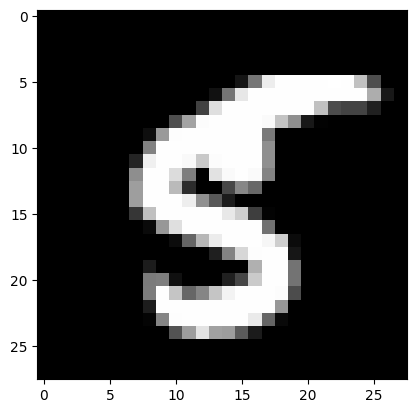

In [45]:
img,label = test_dataset[347]
plt.imshow(img.permute(1,2,0),cmap='gray')
print('label',label,'predicted',predict_image(img,model))

label 9 predicted 3


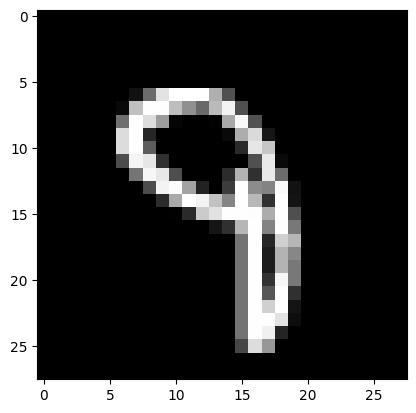

In [46]:
img,label = test_dataset[193]
plt.imshow(img.permute(1,2,0),cmap='gray')
print('label',label,'predicted',predict_image(img,model))

label 2 predicted 2


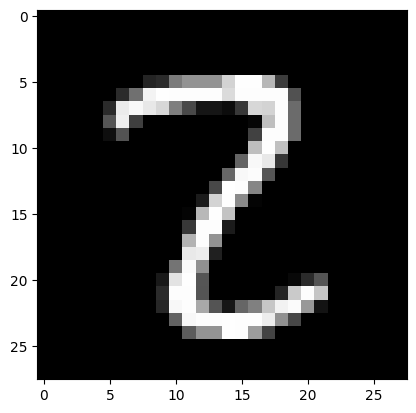

In [47]:
img,label = test_dataset[1839]
plt.imshow(img.permute(1,2,0),cmap='gray')
print('label',label,'predicted',predict_image(img,model))

In [48]:
test_loader = DeviceDataLoader(DataLoader(test_dataset,batch_size=256),device)
result = evaluate(model,test_loader)
result

{'val_loss': 0.2329230159521103, 'val_acc': 0.9322265386581421}